In [4]:
## This notebook is a simple demonstration of how the volatility trading library can be used

In [1]:
import volatility.data as data
import volatility.volest as volest
import yfinance as yf

In [4]:
option = data.get_yahoo_option_data("aapl", call=True, put=True)

In [5]:
option

Options(calls=         contractSymbol       lastTradeDate  strike  lastPrice    bid    ask  \
0   AAPL210730C00065000 2021-07-29 18:54:20    65.0      80.80  80.55  80.70   
1   AAPL210730C00070000 2021-07-29 15:39:03    70.0      75.76  75.55  75.70   
2   AAPL210730C00075000 2021-07-28 18:54:25    75.0      70.05  70.55  70.70   
3   AAPL210730C00080000 2021-07-22 14:59:05    80.0      67.80  65.55  65.70   
4   AAPL210730C00085000 2021-07-27 16:09:57    85.0      60.95  60.55  60.70   
5   AAPL210730C00090000 2021-07-29 18:45:52    90.0      55.90  55.55  55.70   
6   AAPL210730C00095000 2021-07-27 14:00:01    95.0      53.61  50.55  50.70   
7   AAPL210730C00100000 2021-07-28 19:00:44   100.0      45.20  45.55  45.70   
8   AAPL210730C00105000 2021-07-29 17:29:38   105.0      40.95  40.55  40.70   
9   AAPL210730C00110000 2021-07-29 17:29:56   110.0      35.60  35.55  35.70   
10  AAPL210730C00113000 2021-07-29 14:18:09   113.0      32.81  32.55  32.70   
11  AAPL210730C00114000 20

In [29]:
df = data.get_yahoo_data_daily(symbol = "AAPL",period= "max")
df2 = data.get_yahoo_data_intraday(symbol= "AAPL", period="1d", interval="1m")

In [30]:
window = 30
windows = [30, 60, 90, 120]
quantiles = [0.25, 0.75]
bins = 100
normed = True
estimator = 'Kurtosis'
symbol = 'AAPL'

In [31]:
vol = volest.VolatilityEstimator(df, estimator)
vol2 = volest.VolatilityEstimator(df2, estimator)

In [32]:
vol._get_estimator(window, df)

Date
1981-01-27   -0.465914
1981-01-28   -0.384214
1981-01-29   -0.665177
1981-01-30   -0.644443
1981-02-02   -0.589161
                ...   
2021-07-19    0.243763
2021-07-20    0.072847
2021-07-21   -0.102372
2021-07-22   -0.104038
2021-07-23    0.143908
Name: Close, Length: 10210, dtype: float64

In [33]:
vol2._get_estimator(window,df)

Date
1981-01-27   -0.465914
1981-01-28   -0.384214
1981-01-29   -0.665177
1981-01-30   -0.644443
1981-02-02   -0.589161
                ...   
2021-07-19    0.243763
2021-07-20    0.072847
2021-07-21   -0.102372
2021-07-22   -0.104038
2021-07-23    0.143908
Name: Close, Length: 10210, dtype: float64

c:\Users\frede\OneDrive\Documents\Concordia\HedgeFund\volatility-trading\volatility\volest.py:223: UserWarning: FixedFormatter should only be used together with FixedLocator
  cones.set_yticklabels(map(f, locs))
c:\Users\frede\OneDrive\Documents\Concordia\HedgeFund\volatility-trading\volatility\volest.py:240: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_yticklabels(map(f, locs))


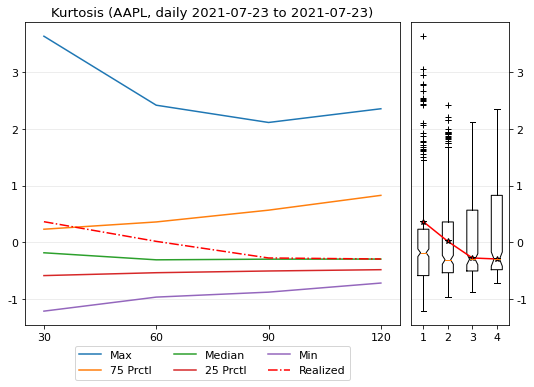

In [34]:
_,plt = vol2.cones(windows,quantiles)

c:\Users\frede\OneDrive\Documents\Concordia\HedgeFund\volatility-trading\volatility\volest.py:223: UserWarning: FixedFormatter should only be used together with FixedLocator
  cones.set_yticklabels(map(f, locs))
c:\Users\frede\OneDrive\Documents\Concordia\HedgeFund\volatility-trading\volatility\volest.py:240: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_yticklabels(map(f, locs))


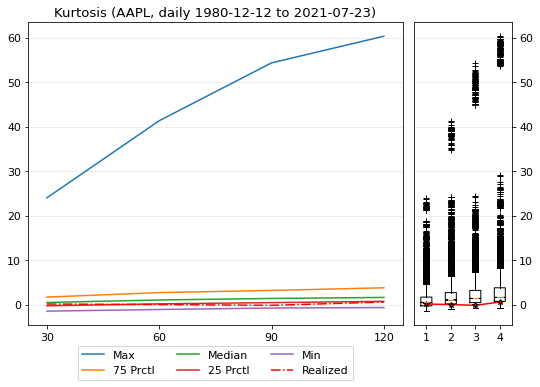

In [35]:
_,plt = vol.cones(windows=windows, quantiles=quantiles)